In [1]:
# ! pip uninstall tensorflow

In [2]:
# pip install tensorflow==2.3

In [3]:
import tensorflow
tensorflow.__version__

'2.3.0'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# from keras import backend as K

In [6]:
X_train = np.load('/content/drive/MyDrive/hand_gesture/X.npy') 
Y_train = np.load('/content/drive/MyDrive/hand_gesture/Y.npy')
Y_train = to_categorical(Y_train, 5)
print(X_train.shape)
print(Y_train.shape)

(2499, 224, 224, 3)
(2499, 5)


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.15, random_state=69,stratify = Y_train)

In [8]:
print(X_train.shape)
print(Y_train.shape)

(2124, 224, 224, 3)
(2124, 5)


In [10]:
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Flatten, Dropout, LeakyReLU, Softmax, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model = Sequential()

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (5,5) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.15))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 512 , activation = 'relu'))
# model.add(Dropout(0.1))
model.add(Dense(units = 5 , activation = 'softmax'))


In [11]:
# from keras.optimizers import Adam
model_save = ModelCheckpoint('./temp.h5',
                             save_best_only = True,
                             save_weights_only = False,
                             monitor = 'val_accuracy', 
                             mode = 'max', verbose = 1)

# initial_learning_rate = 1e-3
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate,
#     decay_steps=755,
#     decay_rate=0.9,
#     staircase=True)

model.compile(optimizer = "adam", loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0

In [12]:
trial1_orig_model_history = model.fit(X_train, Y_train, epochs=20, verbose=1, validation_split=0.2, shuffle=True, batch_size = 128, callbacks=[model_save])

Epoch 1/20
14/14 [==============================] - ETA: 0s - loss: 1.7105 - accuracy: 0.4291
Epoch 00001: val_accuracy improved from -inf to 0.32706, saving model to ./temp.h5
14/14 [==============================] - 9s 644ms/step - loss: 1.7105 - accuracy: 0.4291 - val_loss: 6.4493 - val_accuracy: 0.3271
Epoch 2/20
14/14 [==============================] - ETA: 0s - loss: 0.7444 - accuracy: 0.6998
Epoch 00002: val_accuracy did not improve from 0.32706
14/14 [==============================] - 7s 523ms/step - loss: 0.7444 - accuracy: 0.6998 - val_loss: 10.2608 - val_accuracy: 0.2518
Epoch 3/20
14/14 [==============================] - ETA: 0s - loss: 0.5245 - accuracy: 0.7993
Epoch 00003: val_accuracy did not improve from 0.32706
14/14 [==============================] - 7s 521ms/step - loss: 0.5245 - accuracy: 0.7993 - val_loss: 8.1423 - val_accuracy: 0.2612
Epoch 4/20
14/14 [==============================] - ETA: 0s - loss: 0.3900 - accuracy: 0.8481
Epoch 00004: val_accuracy improved fr

In [13]:
model_temp = tensorflow.keras.models.load_model('./temp.h5')
model_temp.evaluate(X_test, Y_test)

12/12 [==============================] - 1s 64ms/step - loss: 0.2407 - accuracy: 0.9120


[0.24074600636959076, 0.9120000004768372]

In [14]:
Y_pred = np.argmax(model_temp.predict(X_test), axis=1)
print(Y_pred)

[4 1 2 0 0 2 1 4 0 3 2 0 0 3 0 1 1 4 4 2 4 2 4 3 2 1 3 1 4 2 2 0 3 1 2 4 2
 2 4 1 1 2 3 0 0 1 2 1 3 1 0 1 3 3 4 3 1 1 0 1 2 4 0 1 0 1 4 3 0 3 0 2 0 1
 2 4 0 0 4 4 2 0 3 0 2 0 0 1 3 3 2 3 3 3 3 2 2 0 4 3 4 1 3 0 3 2 2 0 2 2 0
 2 0 0 0 3 2 2 4 1 0 2 3 0 4 3 0 1 3 4 4 4 0 1 2 3 4 0 0 4 3 3 4 2 2 3 1 1
 3 0 4 3 1 1 0 2 4 1 1 0 4 0 0 3 2 0 1 2 1 4 0 4 3 4 0 0 3 1 3 0 0 1 3 0 2
 2 1 3 3 4 2 3 3 3 0 1 3 3 2 1 1 2 2 1 1 1 1 1 4 4 1 1 2 1 0 3 0 3 3 2 0 4
 4 3 3 4 3 0 3 3 4 4 1 0 2 1 1 2 2 1 1 2 0 2 3 1 0 0 1 4 3 0 3 1 4 1 2 0 0
 2 2 4 2 3 2 0 2 0 3 0 0 2 0 3 3 2 4 3 0 2 1 0 1 3 3 4 2 0 3 1 1 1 1 4 2 4
 3 3 2 2 1 4 2 1 2 0 4 1 1 4 2 3 1 1 2 4 3 0 2 1 3 3 1 3 0 1 1 2 3 3 2 3 3
 2 4 4 2 2 3 3 1 2 2 0 3 4 3 0 1 1 1 0 0 4 2 3 2 0 2 4 2 1 4 0 0 1 1 2 0 2
 4 2 4 3 4]


In [15]:
#Balanced Multiclass Accuracy code
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(np.argmax(Y_test, axis = 1), Y_pred)

0.9111282303294453

In [16]:
#Classification Report Code
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

label_list = []
cm_orig = confusion_matrix(np.argmax(Y_test, axis = 1),Y_pred)
print(cm_orig)
cr_orig = classification_report(np.argmax(Y_test, axis = 1), Y_pred)
print("Classification Report: ")
print(cr_orig)

[[75  1  0  0  0]
 [ 2 70  0  0  0]
 [ 0  6 74  1  1]
 [ 1  0  4 67  2]
 [ 0  1  2 12 56]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        76
           1       0.90      0.97      0.93        72
           2       0.93      0.90      0.91        82
           3       0.84      0.91      0.87        74
           4       0.95      0.79      0.86        71

    accuracy                           0.91       375
   macro avg       0.91      0.91      0.91       375
weighted avg       0.91      0.91      0.91       375



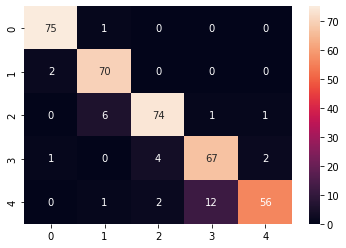

In [17]:
import seaborn as sns
sns.heatmap(cm_orig, annot = True)

Text(0, 0.5, 'Loss')

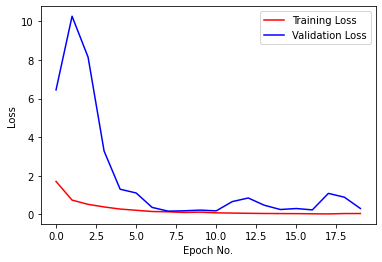

In [18]:
#Training Loss Plot Code
import matplotlib.pyplot as plt
f,ax=plt.subplots(1,1) 

#Loss
ax.plot(trial1_orig_model_history.history['loss'],color='red',label='Training Loss')
ax.plot(trial1_orig_model_history.history['val_loss'],color='blue',label='Validation Loss')

plt.legend()
plt.xlabel("Epoch No.")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

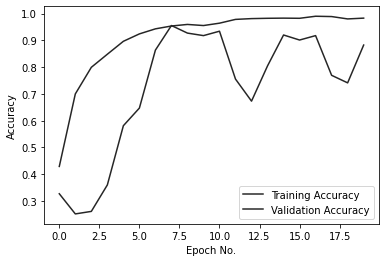

In [19]:
#Training Accuracy Plot Code
f1,ax1=plt.subplots(1,1) 

#Loss
ax1.plot(trial1_orig_model_history.history['accuracy'],color='0.15',label='Training Accuracy')
ax1.plot(trial1_orig_model_history.history['val_accuracy'],color='0.15',label='Validation Accuracy')

plt.legend()
plt.xlabel("Epoch No.")
plt.ylabel("Accuracy")

In [20]:
! pip install scikit-plot

In [21]:
import scikitplot as skplt

Y_test_arg = np.argmax(Y_test, 1)

Y_test_li = []
Y_pred_li = []

for i in range(len(Y_test_arg)):
  if Y_test_arg[i] == 0:
    Y_test_li.append('Gesture 1')
  elif Y_test_arg[i] == 1:
    Y_test_li.append('Gesture 2')
  elif Y_test_arg[i] == 2:
    Y_test_li.append('Gesture 3')
  elif Y_test_arg[i] == 3:
    Y_test_li.append('Gesture 4')
  else:
    Y_test_li.append('Gesture 5')

Y_pred_arg = Y_pred.copy()
for i in range(len(Y_pred_arg)):
  if Y_pred_arg[i] == 0:
    Y_pred_li.append('Gesture 1')
  elif Y_pred_arg[i] == 1:
    Y_pred_li.append('Gesture 2')
  elif Y_pred_arg[i] == 2:
    Y_pred_li.append('Gesture 3')
  elif Y_pred_arg[i] == 3:
    Y_pred_li.append('Gesture 4')
  else:
    Y_pred_li.append('Gesture 5')
    

<Figure size 432x288 with 0 Axes>

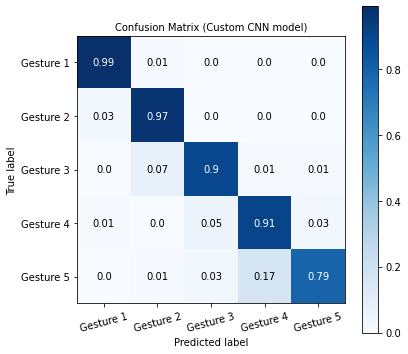

In [22]:
plt.figure()
skplt.metrics.plot_confusion_matrix(Y_test_li, Y_pred_li, normalize=True, title = 'Confusion Matrix (Custom CNN model)', figsize = (6, 6), x_tick_rotation = 15, 
                                    title_fontsize = 'medium', text_fontsize = 'medium')
# plt.show()
plt.savefig('conf_matrix3.jpeg', dpi = 600, bbox_inches='tight', transparent = False)
plt.show()

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_fscore_support, accuracy_score, roc_auc_score

print(precision_recall_fscore_support(np.argmax(Y_test, axis = 1), Y_pred))

print(precision_score(np.argmax(Y_test, axis = 1), Y_pred, average = None))

print(recall_score(np.argmax(Y_test, axis = 1), Y_pred, average = None))

print(f1_score(np.argmax(Y_test, axis = 1), Y_pred, average = None))

# print(roc_auc_score(np.argmax(Y_test, axis = 1), Y_pred))

print(accuracy_score(np.argmax(Y_test, axis = 1), Y_pred))

(array([0.96153846, 0.8974359 , 0.925     , 0.8375    , 0.94915254]), array([0.98684211, 0.97222222, 0.90243902, 0.90540541, 0.78873239]), array([0.97402597, 0.93333333, 0.91358025, 0.87012987, 0.86153846]), array([76, 72, 82, 74, 71]))
[0.96153846 0.8974359  0.925      0.8375     0.94915254]
[0.98684211 0.97222222 0.90243902 0.90540541 0.78873239]
[0.97402597 0.93333333 0.91358025 0.87012987 0.86153846]
0.912


In [24]:
Y_pred1 = model_temp.predict(X_test)

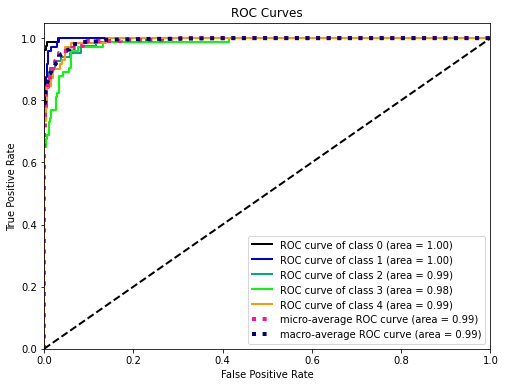

In [25]:
skplt.metrics.plot_roc(Y_test_arg, Y_pred1, figsize = (8, 6))
# plt.title('ROC Curve (Model initialized with ImageNet weights)')
plt.savefig('roc_auc3.jpeg', dpi = 600, bbox_inches='tight', transparent = False)
plt.show()